# Quicksort Algorithm

Distribution of the number of comparisons necessary to sort an array using the quicksort algorithm. Inspired by the materials belonging to: 
https://mast.queensu.ca/~stat455/.

The algorithm works by recursively dividing the array into sub-arrays of elements that are larger or smaller than a randomly chosen entry (the "pivot").


```
def quicksort(x):
    l = len(x)
    
    if l == 0 or l == 1:
        return x  # no sorting needed
    else:
        pivot = pop(x) # choose & remove pivot
        H = []
        L = []
        for i in x:
            if i < pivot:
                L+=[i]
            else:
                H+=[i]
        
        H = quicksort(H) # recursion
        L = quicksort(L)
        
        return L+H
```

The code shown below has some extra lines to keep track of the number of "i<pivot" comparisons made. 


### Expected Number of Comparisons

Because the pivot is randomly chosen, the amount of comparisons $X_n$ needed to sort an array of length $n$ is a random variable. 

For arrays of length $n\in\{0,1,2\}$, the answer can be guessed:

\begin{equation}
\begin{array}{l}
\mathbb{E}[X_0] = 0\\
\mathbb{E}[X_1] = 0\\
\mathbb{E}[X_2] = 1\\
\end{array}
\end{equation}

For the general case, $\mathbb{E}[E_n]$, it is natural to condition on the *rank* of the pivot, $Y$. *Rank* meaning the size of the pivot relative to the other numbers in the array. $Y=1$ would mean that the pivot is the smallest number, $Y=5$ would mean the 5th smallest number etc.

\begin{equation}
\mathbb{E}[X_n] = \mathbb{E}[\mathbb{E}[X_n|Y=j]] = \sum_{j=1}^n \mathbb{E}[X_n|Y=j] \left(\frac{1}{n}\right)
\end{equation}

Where I made use of the fact that $p(Y=j) = \frac{1}{n}$. For a given choice of $Y=j$, the algorithm makes $n-1$ comparisons. It then calls quicksort again on two arrays of length $j-1$ and $n-j$ (the pivot was removed, so the two parts add up to a length of $n-1$). Hence the expectation for then number of comparison operations, conditioned on $j$, is:

\begin{equation}
\mathbb{E}[X_n|Y=j] = n-1 + \mathbb{E}[X_{j-1}] + \mathbb{E}[X_{n-j}] 
\end{equation}

Taking the expectation with respect to the pivot:

\begin{equation}
\begin{array}{rl}
\mathbb{E}[X_n] &= \frac{1}{n}\sum_{j=1}^n \left(n-1 + \mathbb{E}[X_{j-1}] + \mathbb{E}[X_{n-j}]\right)\\
&= \frac{1}{n}\left[\underbrace{\sum_{j=1}^n (n-1)}_{n(n-1)} + 2\sum_{j=1}^{n-1}\mathbb{E}[X_j] \right]\\
\mathbb{E}[X_n]n - n(n-1)&= 2\sum_{j=1}^{n-1} \mathbb{E}[X_j]
\end{array}
\end{equation}

It's nicer to have an expression that depends on the previous term only, so the usual trick is applied:
\begin{equation}
\begin{array}{rl}
\mathbb{E}[X_{n+1}] (n+1) - \mathbb{E}[X_{n}] n &= n(n+1) - n(n-1) + 2\mathbb{E}[X_{n}] \\
\mathbb{E}[X_{n+1}]&= \frac{1}{n+1} \left[ 2n + \mathbb{E}[X_{n}] (n+2) \right]
\end{array}
\end{equation}

It's possible to calculate an expression that does not rely on recursion, but I will leave it at this!

Text(0.5, 1.0, 'Quicksort - Number of Comparisons (array size: 10)')

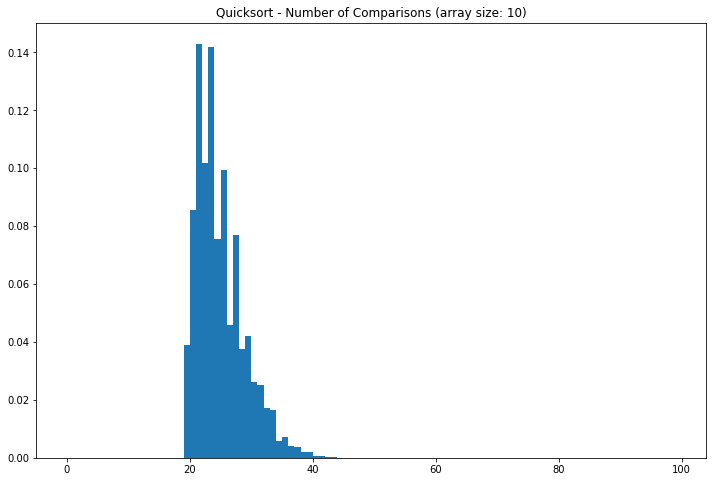

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_array(n):
    """
    Get a shuffled array of integers (without duplicates)
    """
    return list(np.random.permutation(list(range(n))))



def quicksort(x):
    """
    Returns sorted array and the number of comparisons made in sorting the array.
    """
    
    l = len(x)
    n = 0
    
    if l == 0 or l == 1: # no sorting needed
        return n,x
    
    else:
        pivot = x.pop() # randomly choose a pivot from array
        H = []
        L = []
        for i in x: # assign elements to H(igher) or L(ower) array depending on size relative to pivot
            n+=1
            if i > pivot:
                H+=[i]
            else:
                L+=[i]
        
        n_l, L = quicksort(L) # recursively call quicksort on H and L arrays.s
        n_h, H = quicksort(H)
        
        n = n+n_l+n_h
        
        return n,L+H
    

# simulation
n_trials = 10000
array_length = 10

n_comparisons = []
for i in range(n_trials):
    
    x = get_array(array_length)
    n,_ = quicksort(x)
    
    n_comparisons+=[n]
    
    
plt.figure(figsize=(12,8))
_ = plt.hist(n_comparisons,bins = list(range(array_length**2)),density=True)
plt.title('Quicksort - Number of Comparisons (array size: %i)' % array_length)

In [2]:
def M_n(n):
    """
    Expected number of comparisons necessary for an array of length n
    """
    if n == 0 or n == 1:
        return 0
    
    else:
        M_n = 1
        for i in range(2,n):
            M_n = (1/(i+1))*(2*i+M_n*(i+2))
            
        return M_n
    

def M_n_simulated(array_length,n_trials=2000):
    """
    simulate expected number of comparisons
    """
    n_comparisons = []
    for i in range(n_trials):

        x = get_array(array_length)
        n_,_ = quicksort(x)

        n_comparisons+=[n_]
        
    return np.mean(n_comparisons)

Text(0, 0.5, 'expected comparisons')

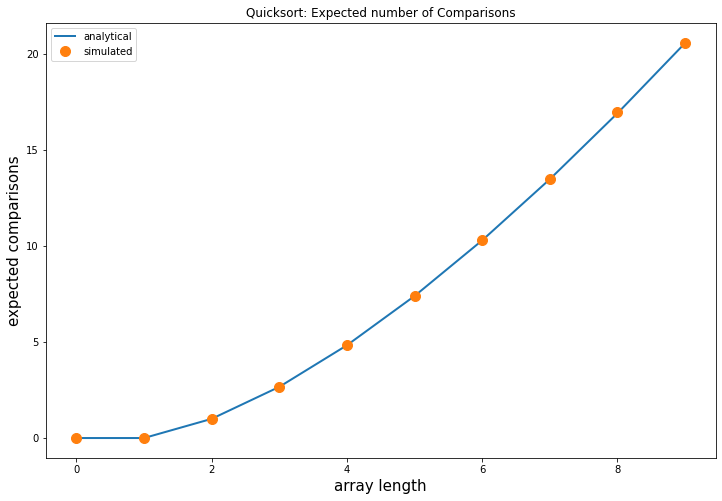

In [3]:
nn = list(range(10))

analytical = [M_n(n) for n in nn]
simulated = [M_n_simulated(n,n_trials=5000) for n in nn]

plt.figure(figsize=(12,8))
plt.plot(nn,analytical,'-',linewidth=2)
plt.plot(nn,simulated,'o',markersize=10)
plt.legend(['analytical','simulated'])

_ = plt.title('Quicksort: Expected number of Comparisons')
plt.xlabel('array length',fontsize=15)
plt.ylabel('expected comparisons',fontsize=15)